Ariana Sato Flores
20192304

Lectura:
El objetivo de este artículo es examinar los impactos a largo plazo del tipo de trabajo conocido como “mita” que aún es vigente en el país desde los años 1573. Para alcanzar el objetivo, el autor busca encontrar resultados de los efectos del trabajo forzoso minero y su relación con la tenencia de tierras y provisión de bienes públicos. La hipótesis que el autor plantea es si la presencia a largo plazo de grandes terratenientes en países que usaron la “mita”, llegó a que los distritos proporcionen un sistema estable de tenencia de tierra que fomente la provisión de bienes públicos.

Las fortalezas del artículo se encuentran en el esfuerzo del autor por aplicar una mirada histórica sumada a la estadística para poder encontrar más detalle en la investigación, por ejemplo, se utilizan datos del Imperio español con la República peruana y los combina con el enfoque RD, de esta manera logra investigar los canales de persistencia. El autor rescata la importancia de la literatura histórica en vistas de lograr una imagen informativa en el artículo. Además, usa data de los años 1689 sobre haciendas y distritos. Sin embargo, el mismo autor menciona como debilidad la limitación de las encuestas de hogares en muchos años atrás, pues proporcionan poca potencia para estimar modelos flexibles en la investigación para la magnitud de estimación de la “mita”. Finalmente, es el intento del autor por obtener un resultado con base en evidencia tanto cuantitativa como histórica.

Encuentro como contribución en este trabajo, lo que la evidencia histórica nos puede decir acerca de los terratenientes y sus conexiones políticas para asegurar los bienes públicos. También, se rescata la explotación de la variación exógena en la asignación de la mita e identificar los canales a través de los que influye en el desarrollo económico contemporáneo. La evidencia final del autor acerca de explorar las restricciones sobre cómo usar el estado para las interacciones económicas, puede contribuir a la desigualdad de las tierras para generar un crecimiento a largo plazo en miras a desarrollo institucional.

El desarrollo de modelos generales de evolución institucional y la investigación empírica de cómo estas restricciones son influenciadas por fuerzas que promueven el cambio son áreas particularmente centrales para futuras investigaciones. Acemoglu (2014) concuerda con que existe una relación entre instituciones, capital humano y desarrollo, además hace referencia a desarrollar mejores medidas de las instituciones subnacionales y explotar la rica variación subnacional en las trayectorias de desarrollo institucional y los resultados de desarrollo.

Códigos:

In [1]:
!pip install plotnine

In [2]:
pip install linearmodels

In [23]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import pylab as plt
import matplotlib.pyplot as plt

*EJERCICIO 1*

Relevance:
La idea de relavancia consiste en que las variables instrumentales es que utilizamos la parte 
"X" , el tratamiento que será explicada por el instrumento "z". Cuando ninguna de las variables tiene relación
y no se pueden explicar entre sí, signfica que las variables instrumentales no funcionan. Debe existir una 
covariación para un efecto de relevancia.

Validity:
Este supuesto implica que el instrumento "z" es una variable que no tiene
puertas abiertas por sí misma,es decir, que tiene opciones a más variables que expliquen "y".
cualquier camino entre el instrumento z y el resultado y debe pasar por el tratamiento o estar cerrado.
las variables instrumentales no nos eximen del deber de cerrar todas las puertas traseras que hay
sólo traslada esa responsabilidad del tratamiento al instrumento, y es de esperar que el instrumento sea más fácil.


Ploteo de Histogramas

In [22]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

def read_data(file): 
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)

base = read_data("card.dta")
base.head()

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,KWW,IQ,married,libcrd14,exper,lwage,expersq,u_lwage,lwage_hat,u_educ
0,2.0,0.0,0.0,7.0,29.0,NaN,NaN,158413.0,1.0,0.0,...,15.0,NaN,1.0,0.0,16.0,6.306275,256.0,0.198047,6.108228,-3.067539
1,3.0,0.0,0.0,12.0,27.0,8.0,8.0,380166.0,1.0,0.0,...,35.0,93.0,1.0,1.0,9.0,6.175867,81.0,-0.211160,6.387027,-1.727562
2,4.0,0.0,0.0,12.0,34.0,14.0,12.0,367470.0,1.0,0.0,...,42.0,103.0,1.0,1.0,16.0,6.580639,256.0,0.204719,6.375920,1.012975
3,5.0,1.0,1.0,11.0,27.0,11.0,12.0,380166.0,1.0,0.0,...,25.0,88.0,1.0,1.0,10.0,5.521461,100.0,-0.967905,6.489366,-2.253536
4,6.0,1.0,1.0,12.0,34.0,8.0,7.0,367470.0,1.0,0.0,...,34.0,108.0,1.0,0.0,16.0,6.591674,256.0,0.125173,6.466501,1.090437


In [24]:
base2=base

#Seleccionamos las columnas a ultilizar

base3 = base2[['educ','nearc4']]
base3

,educ,nearc4
0,7.0,0.0
1,12.0,0.0
2,12.0,0.0
3,11.0,1.0
4,12.0,1.0
...,...,...
3005,12.0,1.0
3006,13.0,1.0
3007,12.0,1.0
3008,12.0,1.0


In [25]:


base4 = (base3
 .assign(nearc4_school = np.select(
     [base3["nearc4"].astype(bool), base3["educ"].astype(bool)],
     ["school", "N_school"]
 ))) 
base4

,educ,nearc4,nearc4_school
0,7.0,0.0,N_school
1,12.0,0.0,N_school
2,12.0,0.0,N_school
3,11.0,1.0,school
4,12.0,1.0,school
...,...,...,...
3005,12.0,1.0,school
3006,13.0,1.0,school
3007,12.0,1.0,school
3008,12.0,1.0,school


In [26]:
card = read_data("card.dta")
card.head()

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,KWW,IQ,married,libcrd14,exper,lwage,expersq,u_lwage,lwage_hat,u_educ
0,2.0,0.0,0.0,7.0,29.0,NaN,NaN,158413.0,1.0,0.0,...,15.0,NaN,1.0,0.0,16.0,6.306275,256.0,0.198047,6.108228,-3.067539
1,3.0,0.0,0.0,12.0,27.0,8.0,8.0,380166.0,1.0,0.0,...,35.0,93.0,1.0,1.0,9.0,6.175867,81.0,-0.211160,6.387027,-1.727562
2,4.0,0.0,0.0,12.0,34.0,14.0,12.0,367470.0,1.0,0.0,...,42.0,103.0,1.0,1.0,16.0,6.580639,256.0,0.204719,6.375920,1.012975
3,5.0,1.0,1.0,11.0,27.0,11.0,12.0,380166.0,1.0,0.0,...,25.0,88.0,1.0,1.0,10.0,5.521461,100.0,-0.967905,6.489366,-2.253536
4,6.0,1.0,1.0,12.0,34.0,8.0,7.0,367470.0,1.0,0.0,...,34.0,108.0,1.0,0.0,16.0,6.591674,256.0,0.125173,6.466501,1.090437


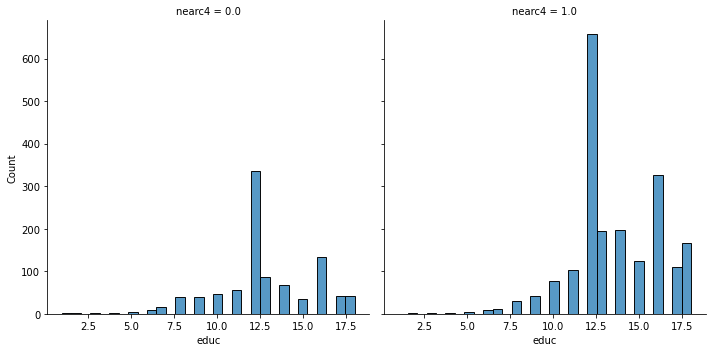

In [27]:
sns.displot(card, x="educ", col = "nearc4")

Regresiones

In [28]:
#OLS
ols_reg = sm.OLS.from_formula("lwage ~ educ + exper + black + south + married + smsa", 
              data = card).fit()

ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     219.2
Date:                Mon, 14 Nov 2022   Prob (F-statistic):          1.97e-232
Time:                        11:53:18   Log-Likelihood:                -1273.9
No. Observations:                3003   AIC:                             2562.
Df Residuals:                    2996   BIC:                             2604.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0633      0.064     79.437      0.000       4.938       5.188
educ           0.0712      0.003     20.438      0.000       0.064       0.078
exper          0.0342      0.002     15.422      0.000       0.030       0.038
black         -0.1660      0.018     -9.426      0.000      -0.201      -0.131
south         -0.1316      0.015     -8.788      0.000      -0.161      -0.102
married       -0.0359      0.003    -10.547      0.000      -0.043      -0.029
smsa           0.1758      0.015     11.372      0.000       0.145       0.206
==============================================================================
Omnibus:                       53.196   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.430
Skew:                          -0.231   Prob(JB):                     8.38e-16
Kurtosis:                       3.584   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
Se puede observar que las variables son significativas al mostrar un p valor menor a 0.05, las variables tienen
efectos sobre la variable "ingresos".
Además, podemos decir que el modelo explica un 30.4% la variabilidad de la variable ingreso "lwage".



In [42]:
# There are null values in the dataset, we will fill them with 0
base['married'] = base['married'].fillna(0)

In [44]:
from linearmodels import IV2SLS

In [45]:
#2SLS
iv_reg = IV2SLS.from_formula("lwage ~  1 + exper + black + south + married + smsa + [educ ~ nearc2]", card).fit()
iv_reg.summary

C:\Users\Ariana\anaconda3\lib\site-packages\linearmodels\iv\model.py:543: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.


<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                  lwage   R-squared:                     -1.2536
Estimator:                    IV-2SLS   Adj. R-squared:                -1.2581
No. Observations:                3003   F-statistic:                    296.29
Date:                Mon, Nov 14 2022   P-value (F-stat)                0.0000
Time:                        11:57:31   Distribution:                  chi2(6)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      0.2107     3.1235     0.0675     0.9462     -5.9112      6.3327
black          0.1051     0.1786     0.5888     0.5560     -0.2449      0.4552
exper          0.1496     0.0744     2.0111     0.0443      0.0038      0.2954
married       -0.0149     0.0149    -0.9965     0.3190     -0.0442      0.0144
smsa           0.0245     0.1018     0.2410     0.8095     -0.1749      0.2240
south         -0.0325     0.0689    -0.4719     0.6370     -0.1675      0.1025
educ           0.3566     0.1837     1.9410     0.0523     -0.0035      0.7167
==============================================================================

Endogenous: educ
Instruments: nearc2
Robust Covariance (Heteroskedastic)
Debiased: False
"""

In [ ]:
En este caso el p value de las variables son mayor a 0.05 por lo que no son significativas.
También podemos decir que xplica un 1.3% la variabilidad de la variable ingreso "lwage".
Por cada año de experiencia laboral. el nivel de ingreso aumenta en 0.15 unidades logaritmicas.